In [1]:
import numpy as np
import pandas as pd
import model as model
import optimizers as opt

# Допоміжні функції

In [2]:
def L2_analytical(X, y, l2):
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    return np.linalg.inv(X.T @ X + l2 * np.eye(X.shape[1])) @ X.T @ y

In [3]:
def regression_analytical(X, y):
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    return np.linalg.inv(X.T @ X) @ X.T @ y

In [4]:
def load_data(var=1):
    data = pd.read_excel("TestRegData.xlsx", sheet_name=f"Var{var}").to_numpy()
    return data[:, :-1], data[:, -1]

In [4]:
def linear_function(x, params):
    """
    x: 2-D array
    params: 1-D array with params[0] = bias and params[1:] = weights
    """
    params.reshape(-1, 1)
    return np.dot(x, params[1:]) + params[0]

# Регрессія
## Рій часток

In [6]:
X, y = load_data(1)

In [7]:
regression_model = model.Model(X, y, linear_function)

### Без регулярізації

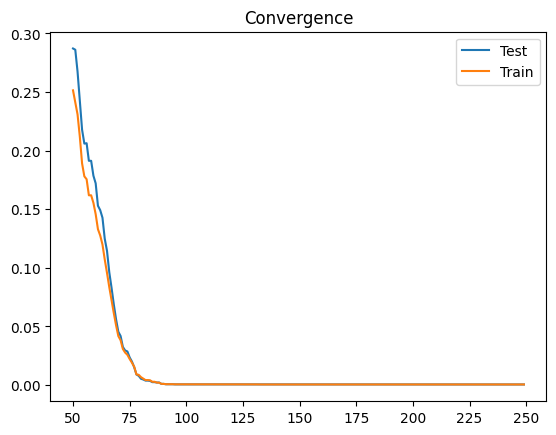

In [8]:
pso_none = opt.PSO(250, X.shape[1] + 1, 1, 3, np.array([[-6, 6]]), -0.1, 0.1)
pso_params_none, pso_losses_none = pso_none.main_loop(regression_model, 250, verbose=False, gif_name="Gifs\PSO_none")

In [9]:
reg_params = regression_analytical(X, y)
reg_losses = regression_model.loss(reg_params), regression_model.test_loss(reg_params)
print(
"""
PSO without regularizer
Params: {0}
Losses: {1}

Analytical solution
Params: {2}
Losses: {3}

Parameter's difference: {4}
""".format(pso_params_none, pso_losses_none, reg_params, reg_losses, np.abs(reg_params - pso_params_none).mean())
)


PSO without regularizer
Params: [ 4.08339734  4.99543323  1.98501171 -0.00581658  4.98852965 -3.97821552
 -3.01376154 -4.99926397 -5.02868451]
Losses: (0.00048295471998390985, 0.00046485402472791894)

Analytical solution
Params: [ 4.05421267e+00  5.00311503e+00  1.99759036e+00 -4.07853437e-04
  4.99869557e+00 -3.99608898e+00 -3.00133649e+00 -5.00640806e+00
 -5.00441910e+00]
Losses: (0.00040014199537671504, 0.00040233461983871287)

Parameter's difference: 0.014080864801747701



### $L_1$ регулярізація

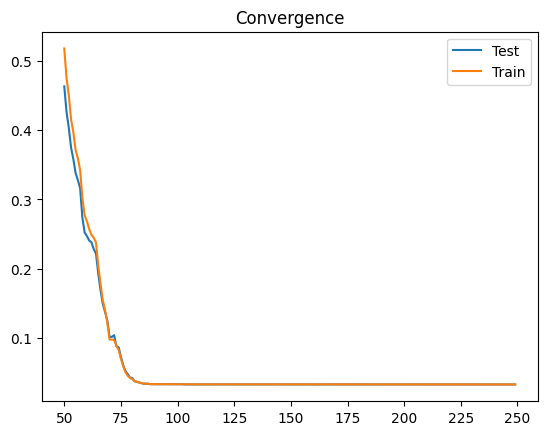

In [10]:
pso_l1 = opt.PSO(250, X.shape[1] + 1, 1, 3, np.array([[-6, 6]]), -0.1, 0.1)
pso_params_l1, pso_losses_l1 = pso_l1.main_loop(regression_model, 250, verbose=False, gif_name="Gifs\PSO_l1", regularizer="L1", l1=1e-3)

In [33]:
print(
"""
PSO with L1 regularizer
Params: {0}
Losses: {1}
""".format(pso_params_l1, pso_losses_l1)
)


PSO with L1 regularizer
Params: [ 4.05547032  5.00490309  1.98483037  0.0108951   4.99564134 -4.00281773
 -3.01909452 -5.00678505 -4.9936503 ]
Losses: (0.033519211851639794, 0.033557643252362344)



### $L_2$ регулярізація

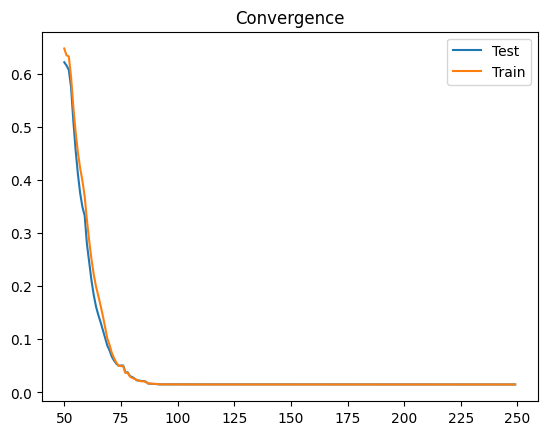

In [11]:
pso_l2 = opt.PSO(250, X.shape[1] + 1, 1, 3, np.array([[-6, 6]]), -0.1, 0.1)
pso_params_l2, pso_losses_l2 = pso_l2.main_loop(regression_model, 250, verbose=False, gif_name="Gifs\PSO_l2", regularizer="L2", l2=1e-4)

In [12]:
analytical_params = L2_analytical(X, y, 1e-4)
analitical_losses = regression_model.loss(analytical_params), regression_model.test_loss(analytical_params)
print(
"""
PSO with L2 regularization
Params: {0}
Losses: {1}

Analytical solution
Params: {2}
Losses: {3}

Parameter's difference: {4}
""".format(pso_params_l2, pso_losses_l2, analytical_params, analitical_losses, np.abs(pso_params_l2 - analytical_params).mean())
)


PSO with L2 regularization
Params: [ 4.02736951  5.02452825  2.0023096  -0.00580238  4.99797729 -3.96753103
 -3.00849954 -4.98815747 -5.01394189]
Losses: (0.0149982845343595, 0.015024327466548722)

Analytical solution
Params: [ 4.05419999e+00  5.00311095e+00  1.99759074e+00 -4.05314503e-04
  4.99869186e+00 -3.99608213e+00 -3.00133027e+00 -5.00640065e+00
 -5.00441027e+00]
Losses: (0.00040014422207610746, 0.0004023280112896645)

Parameter's difference: 0.013619274295880727



### Регулярізація еластичною сіткою

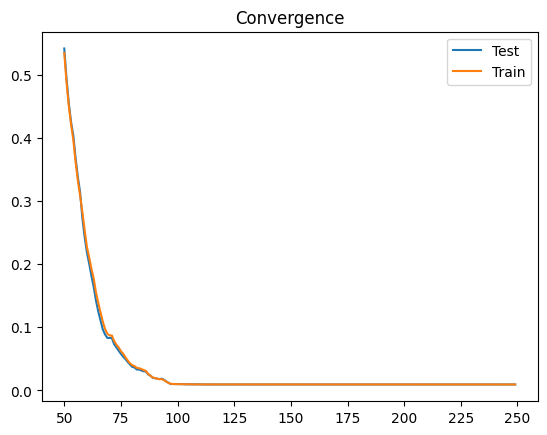

In [13]:
pso_elastic = opt.PSO(250, X.shape[1] + 1, 1, 3, np.array([[-6, 6]]), -0.1, 0.1)
pso_params_elastic, pso_losses_elastic = pso_elastic.main_loop(regression_model, 250, 
                                                       verbose=False, gif_name="Gifs\PSO_elastic", regularizer="elastic_net", l1=5e-5, l2=5e-5)

In [14]:
print(
"""
PSO with elastic net regularizer
Params: {0}
Losses: {1}
""".format(pso_params_elastic, pso_losses_elastic)
)


PSO with elastic net regularizer
Params: [ 4.07294744  4.99339947  1.97019683  0.01849546  5.00132055 -4.01281627
 -3.01341459 -5.00154719 -5.0114534 ]
Losses: (0.009418094583622739, 0.00942167828356478)



### Порівняння

In [15]:
print(
"""
PSO without regularizer
Params: {0}
Losses: {1}

PSO with L1 regularizer
Params: {2}
Losses: {3}

PSO with L2 regularization
Params: {4}
Losses: {5}

PSO with elastic net regularizer
Params: {6}
Losses: {7}
""".format(pso_params_none, pso_losses_none, pso_params_l1, pso_losses_l1, pso_params_l2, pso_losses_l2, pso_params_elastic, pso_losses_elastic)
)


PSO without regularizer
Params: [ 4.08339734  4.99543323  1.98501171 -0.00581658  4.98852965 -3.97821552
 -3.01376154 -4.99926397 -5.02868451]
Losses: (0.00048295471998390985, 0.00046485402472791894)

PSO with L1 regularizer
Params: [ 4.02214177  4.99183186  1.98711604  0.03170647  4.99812832 -3.98769861
 -2.9853579  -5.0017852  -4.98667187]
Losses: (0.033490992864221074, 0.03344485173549227)

PSO with L2 regularization
Params: [ 4.02736951  5.02452825  2.0023096  -0.00580238  4.99797729 -3.96753103
 -3.00849954 -4.98815747 -5.01394189]
Losses: (0.0149982845343595, 0.015024327466548722)

PSO with elastic net regularizer
Params: [ 4.07294744  4.99339947  1.97019683  0.01849546  5.00132055 -4.01281627
 -3.01341459 -5.00154719 -5.0114534 ]
Losses: (0.009418094583622739, 0.00942167828356478)



## Метод диференціальної еволюції
### Без регулярізації

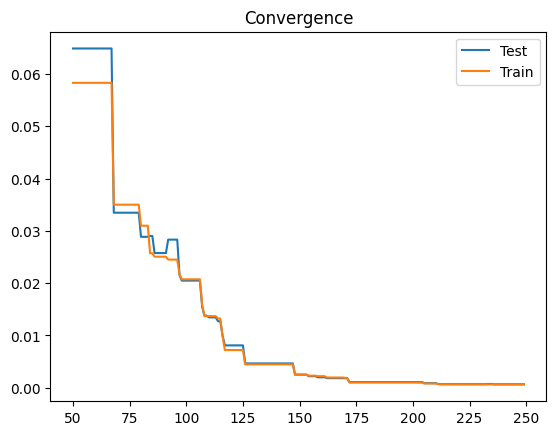

In [21]:
de_none = opt.DE(250, X.shape[1] + 1, np.array([[-6, 6]]))
de_params_none, de_losses_none = de_none.main_loop(250, "random", 0.7, regression_model, verbose=False, gif_name="Gifs\DE_none")

In [22]:
print(
"""
DE without regularizer
Params: {0}
Losses: {1}

Analytical solution
Params: {2}
Losses: {3}

Parameter's difference: {4}
""".format(de_params_none, de_losses_none, reg_params, reg_losses, np.abs(reg_params - de_params_none).mean())
)


DE without regularizer
Params: [ 4.04510944  4.96821809  2.00606163 -0.00764569  5.03260619 -3.96143687
 -2.98970997 -5.0452877  -4.99027822]
Losses: (0.0006074033511306613, 0.0006427797416726164)

Analytical solution
Params: [ 4.05421267e+00  5.00311503e+00  1.99759036e+00 -4.07853437e-04
  4.99869557e+00 -3.99608898e+00 -3.00133649e+00 -5.00640806e+00
 -5.00441910e+00]
Losses: (0.00040014199537671504, 0.00040233461983871287)

Parameter's difference: 0.02143545173727431



### $L_1$ регулярізація

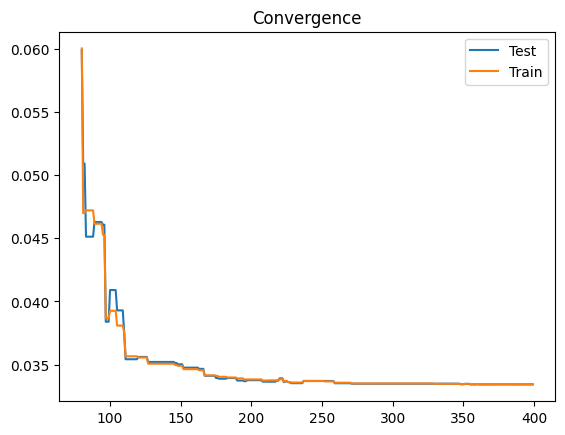


DE with L1 regularizer
Params: [ 4.00840246e+00  5.00501920e+00  2.00514173e+00  2.38520346e-03
  5.00057059e+00 -3.98266422e+00 -2.99559479e+00 -4.98753790e+00
 -4.97150406e+00]
Losses: (0.03343957468749102, 0.03343767621279602)



In [26]:
de_l1 = opt.DE(250, X.shape[1] + 1, np.array([[-6, 6]]))
de_params_l1, de_losses_l1 = de_l1.main_loop(400, "random", 0.7, regression_model, verbose=False, gif_name="Gifs\DE_l1", regularizer="L1", l1=1e-3)
print(
"""
DE with L1 regularizer
Params: {0}
Losses: {1}
""".format(de_params_l1, de_losses_l1)
)

### $L_2$ регулярізація

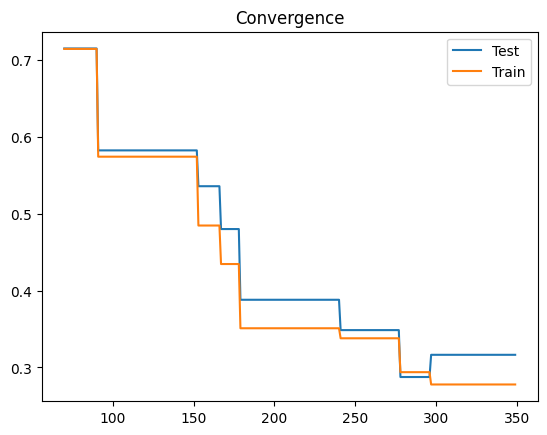

In [31]:
de_l2 = opt.DE(250, X.shape[1] + 1, np.array([[-6, 6]]))
de_params_l2, de_losses_l2 = de_l2.main_loop(350, "random", 0.7, regression_model, verbose=False, gif_name="Gifs\DE_l2", regularizer="L2", l2=1e-4)

In [30]:
print(
"""
DE with L2 regularization
Params: {0}
Losses: {1}

Analytical solution
Params: {2}
Losses: {3}

Parameter's difference: {4}
""".format(de_params_l2, de_losses_l2, analytical_params, analitical_losses, np.abs(de_params_l2 - analytical_params).mean())
)


DE with L2 regularization
Params: [ 3.72471157  4.89580147  3.11242069  0.43491248  4.82011917 -4.03383395
 -4.82403352 -4.31953066 -4.55187402]
Losses: (0.244164156585288, 0.290862555382721)

Analytical solution
Params: [ 4.05419999e+00  5.00311095e+00  1.99759074e+00 -4.05314503e-04
  4.99869186e+00 -3.99608213e+00 -3.00133027e+00 -5.00640065e+00
 -5.00441027e+00]
Losses: (0.00040014422207610746, 0.0004023280112896645)

Parameter's difference: 0.5739310716112278



### Регулярізація еластичною сіткою

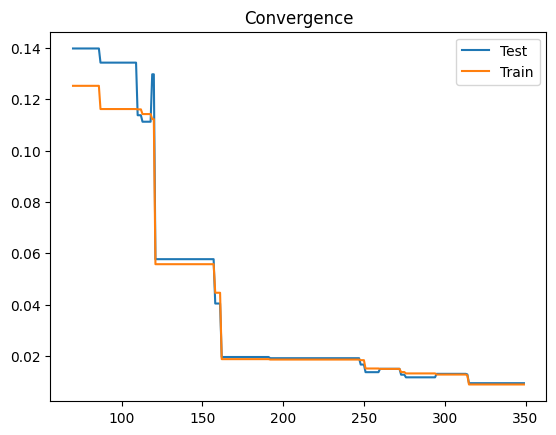

In [34]:
de_elastic = opt.DE(250, X.shape[1] + 1, np.array([[-6, 6]]))
de_params_elastic, de_losses_elastic = de_elastic.main_loop(350, "random", 0.7, 
                                                            regression_model, verbose=False, gif_name="Gifs\DE_elastic",
                                                              regularizer="elastic_net", l1=5e-5, l2=1e-5)

In [36]:
print(
"""
DE with elastic net regularizer
Params: {0}
Losses: {1}
""".format(de_params_elastic, de_losses_elastic)
)


DE with elastic net regularizer
Params: [ 3.95562072  5.09106538  2.05600615  0.19258985  5.17078739 -3.95272992
 -3.15765973 -5.08874136 -5.12916073]
Losses: (0.008845825493688515, 0.009351930510592578)



### Порівняння

In [37]:
print(
"""
DE without regularizer
Params: {0}
Losses: {1}

DE with L1 regularizer
Params: {2}
Losses: {3}

DE with L2 regularization
Params: {4}
Losses: {5}

DE with elastic net regularizer
Params: {6}
Losses: {7}
""".format(de_params_none, de_losses_none, de_params_l1, de_losses_l1, de_params_l2, de_losses_l2, de_params_elastic, de_losses_elastic)
)


DE without regularizer
Params: [ 4.13892695  5.02794899  1.92921068  0.11106658  4.96658242 -4.15289118
 -3.14133698 -4.95231045 -4.97658723]
Losses: (0.0006074033511306613, 0.0006427797416726164)

DE with L1 regularizer
Params: [ 4.00840246e+00  5.00501920e+00  2.00514173e+00  2.38520346e-03
  5.00057059e+00 -3.98266422e+00 -2.99559479e+00 -4.98753790e+00
 -4.97150406e+00]
Losses: (0.03343957468749102, 0.03343767621279602)

DE with L2 regularization
Params: [ 3.81947593  5.2404227   1.89000759 -0.86397695  5.82850776 -3.1918782
 -4.30683226 -5.36042445 -3.45089855]
Losses: (0.2779282556280124, 0.3164967917789378)

DE with elastic net regularizer
Params: [ 3.95562072  5.09106538  2.05600615  0.19258985  5.17078739 -3.95272992
 -3.15765973 -5.08874136 -5.12916073]
Losses: (0.008845825493688515, 0.009351930510592578)



# Бостон

In [5]:
boston_data = pd.read_excel("boston_housing.xlsx").to_numpy()
X_boston, y_boston = boston_data[:, :-1], boston_data[:, -1]

In [7]:
regression_model_boston = model.Model(X_boston, y_boston, linear_function)

## Аналітичний розв'язок

In [125]:
boston_analytical_params = L2_analytical(X_boston, y_boston, 1e-4)
boston_analytical_losses = regression_model_boston.loss(boston_analytical_params), regression_model_boston.test_loss(boston_analytical_params)

boston_regression_parameters = regression_analytical(X_boston, y_boston)
boston_regression_losses = regression_model_boston.loss(boston_regression_parameters), regression_model_boston.test_loss(boston_regression_parameters)
boston_analytical_losses, boston_regression_losses

((2.760275300613764, 3.7608316811336873),
 (1.5874253410107737e+26, 1.2314958874178607e+26))

## Алгоритм рою часток

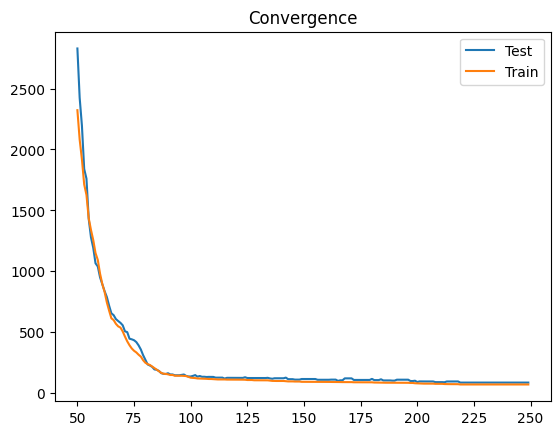

In [21]:
pso_boston = opt.PSO(10 ** 3, X_boston.shape[1] + 1, 1, 3, np.array([[-111, 218]]), -5, 5)
pso_params_boston, pso_losses_boston = pso_boston.main_loop(regression_model_boston, 
                                                            250, verbose=False, gif_name="Gifs\PSO_boston", regularizer="L2", l2=1e-4)

## Алгоритм диференціальної еволюції

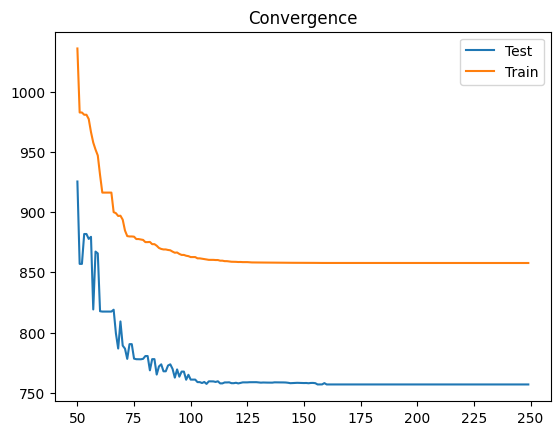

In [126]:
de_boston = opt.DE(100, X_boston.shape[1] + 1, np.array([[-111, 218]]))
de_params_boston, de_losses_boston = de_boston.main_loop(250, "random", 0.1, 
                                                         regression_model_boston, verbose=False, gif_name="Gifs\DE_boston", regularizer="L2", l2=1e-4)

## Порівняння

In [127]:
print(
"""
PSO with L2 regularization
Losses: {}

DE with L2 regularization
Losses: {}

Analytical solution
Losses: {}
""".format(pso_losses_boston, de_losses_boston, boston_analytical_losses)
)


PSO with L2 regularization
Losses: (70.78185386775529, 86.37249165732501)

DE with L2 regularization
Losses: (857.7292501181369, 756.96311632286)

Analytical solution
Losses: (2.760275300613764, 3.7608316811336873)

